In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset = pd.read_csv('train_ctrUa4K.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
q1,q3 = np.percentile(dataset['ApplicantIncome'],[25,75])

In [6]:
qCo1,qCo3 = np.percentile(dataset['CoapplicantIncome'],[25,75])

In [7]:
iqr = q3-q1

In [8]:
irqCo = qCo3 - qCo1

In [9]:
#  upper fences 

lower_upper_fence = q1 - (3 * iqr)
upper_upper_fence = q3 + (3 * iqr)

In [10]:
lower_upper_fence1 = qCo1 - (3 * irqCo)
upper_upper_fence1 = qCo3 + (3 * irqCo)

In [11]:
outliers  = [x for x in dataset['ApplicantIncome'] if x < lower_upper_fence or x > upper_upper_fence]

data_points = [x for x in dataset['ApplicantIncome'] if x > lower_upper_fence and x < upper_upper_fence]

In [12]:
outliersCo = [x for x in dataset['CoapplicantIncome'] if x<lower_upper_fence1 or x>upper_upper_fence1]
datapoinntsCo = [x for x in dataset['CoapplicantIncome'] if x> lower_upper_fence1 and x<upper_upper_fence1]

In [13]:
data_copy = dataset.copy(deep=True)

In [14]:
data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
x = data_copy['ApplicantIncome'].median()
x

3812.5

In [16]:
data_copy.replace(data_copy['ApplicantIncome'] < lower_upper_fence ,x, inplace = True)

In [17]:
data_copy.replace(data_copy['ApplicantIncome'] > upper_upper_fence ,x, inplace = True)

In [18]:
xCo = data_copy['CoapplicantIncome'].median()
xCo

1188.5

In [19]:
data_copy.replace(data_copy['CoapplicantIncome'] < lower_upper_fence1, xCo, inplace = True)
data_copy.replace(data_copy['CoapplicantIncome'] > upper_upper_fence1, xCo, inplace = True)

In [20]:
data_copy.iloc[:10]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [21]:
data_copy = data_copy.drop(['Loan_ID'], axis = 1)

In [22]:
data_copy['Married'] = pd.get_dummies(data_copy['Married'], drop_first = True)
data_copy['Education'] = pd.get_dummies(data_copy['Education'], drop_first = True)
data_copy['Self_Employed'] = pd.get_dummies(data_copy['Self_Employed'], drop_first = True)
data_copy['Loan_Status'] = pd.get_dummies(data_copy['Loan_Status'], drop_first = True)

In [23]:
data_copy['Gender'] = pd.get_dummies(data_copy['Gender'], drop_first = True)

In [24]:
data_copy = pd.get_dummies(data_copy, columns=['Dependents', 'Property_Area'], drop_first=True)

In [25]:
data_copy.iloc[:10]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0,1
6,1,1,1,0,2333,1516.0,95.0,360.0,1.0,1,0,0,0,0,1
7,1,1,0,0,3036,2504.0,158.0,360.0,0.0,0,0,0,1,1,0
8,1,1,0,0,4006,1526.0,168.0,360.0,1.0,1,0,1,0,0,1
9,1,1,0,0,12841,10968.0,349.0,360.0,1.0,0,1,0,0,1,0


In [26]:
data_copy.dtypes

Gender                       uint8
Married                      uint8
Education                    uint8
Self_Employed                uint8
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [27]:
data_copy['Credit_History'].fillna(data_copy['Credit_History'].mode(), inplace = True)
data_copy['LoanAmount'].fillna(data_copy['LoanAmount'].median(), inplace = True)
data_copy['Loan_Amount_Term'].fillna(data_copy['Loan_Amount_Term'].median(), inplace = True)

In [28]:
data_copy['Credit_History'].fillna(data_copy['Credit_History'].median(), inplace = True)

1    422
0    192
Name: Loan_Status, dtype: int64


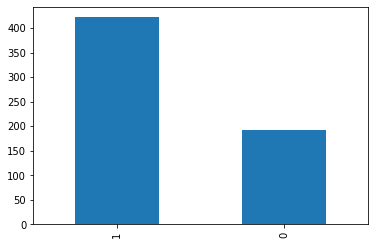

In [29]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = data_copy["Loan_Status"].map(lambda x: color_wheel.get(x + 1))
print(data_copy.Loan_Status.value_counts())
p=data_copy.Loan_Status.value_counts().plot(kind="bar")

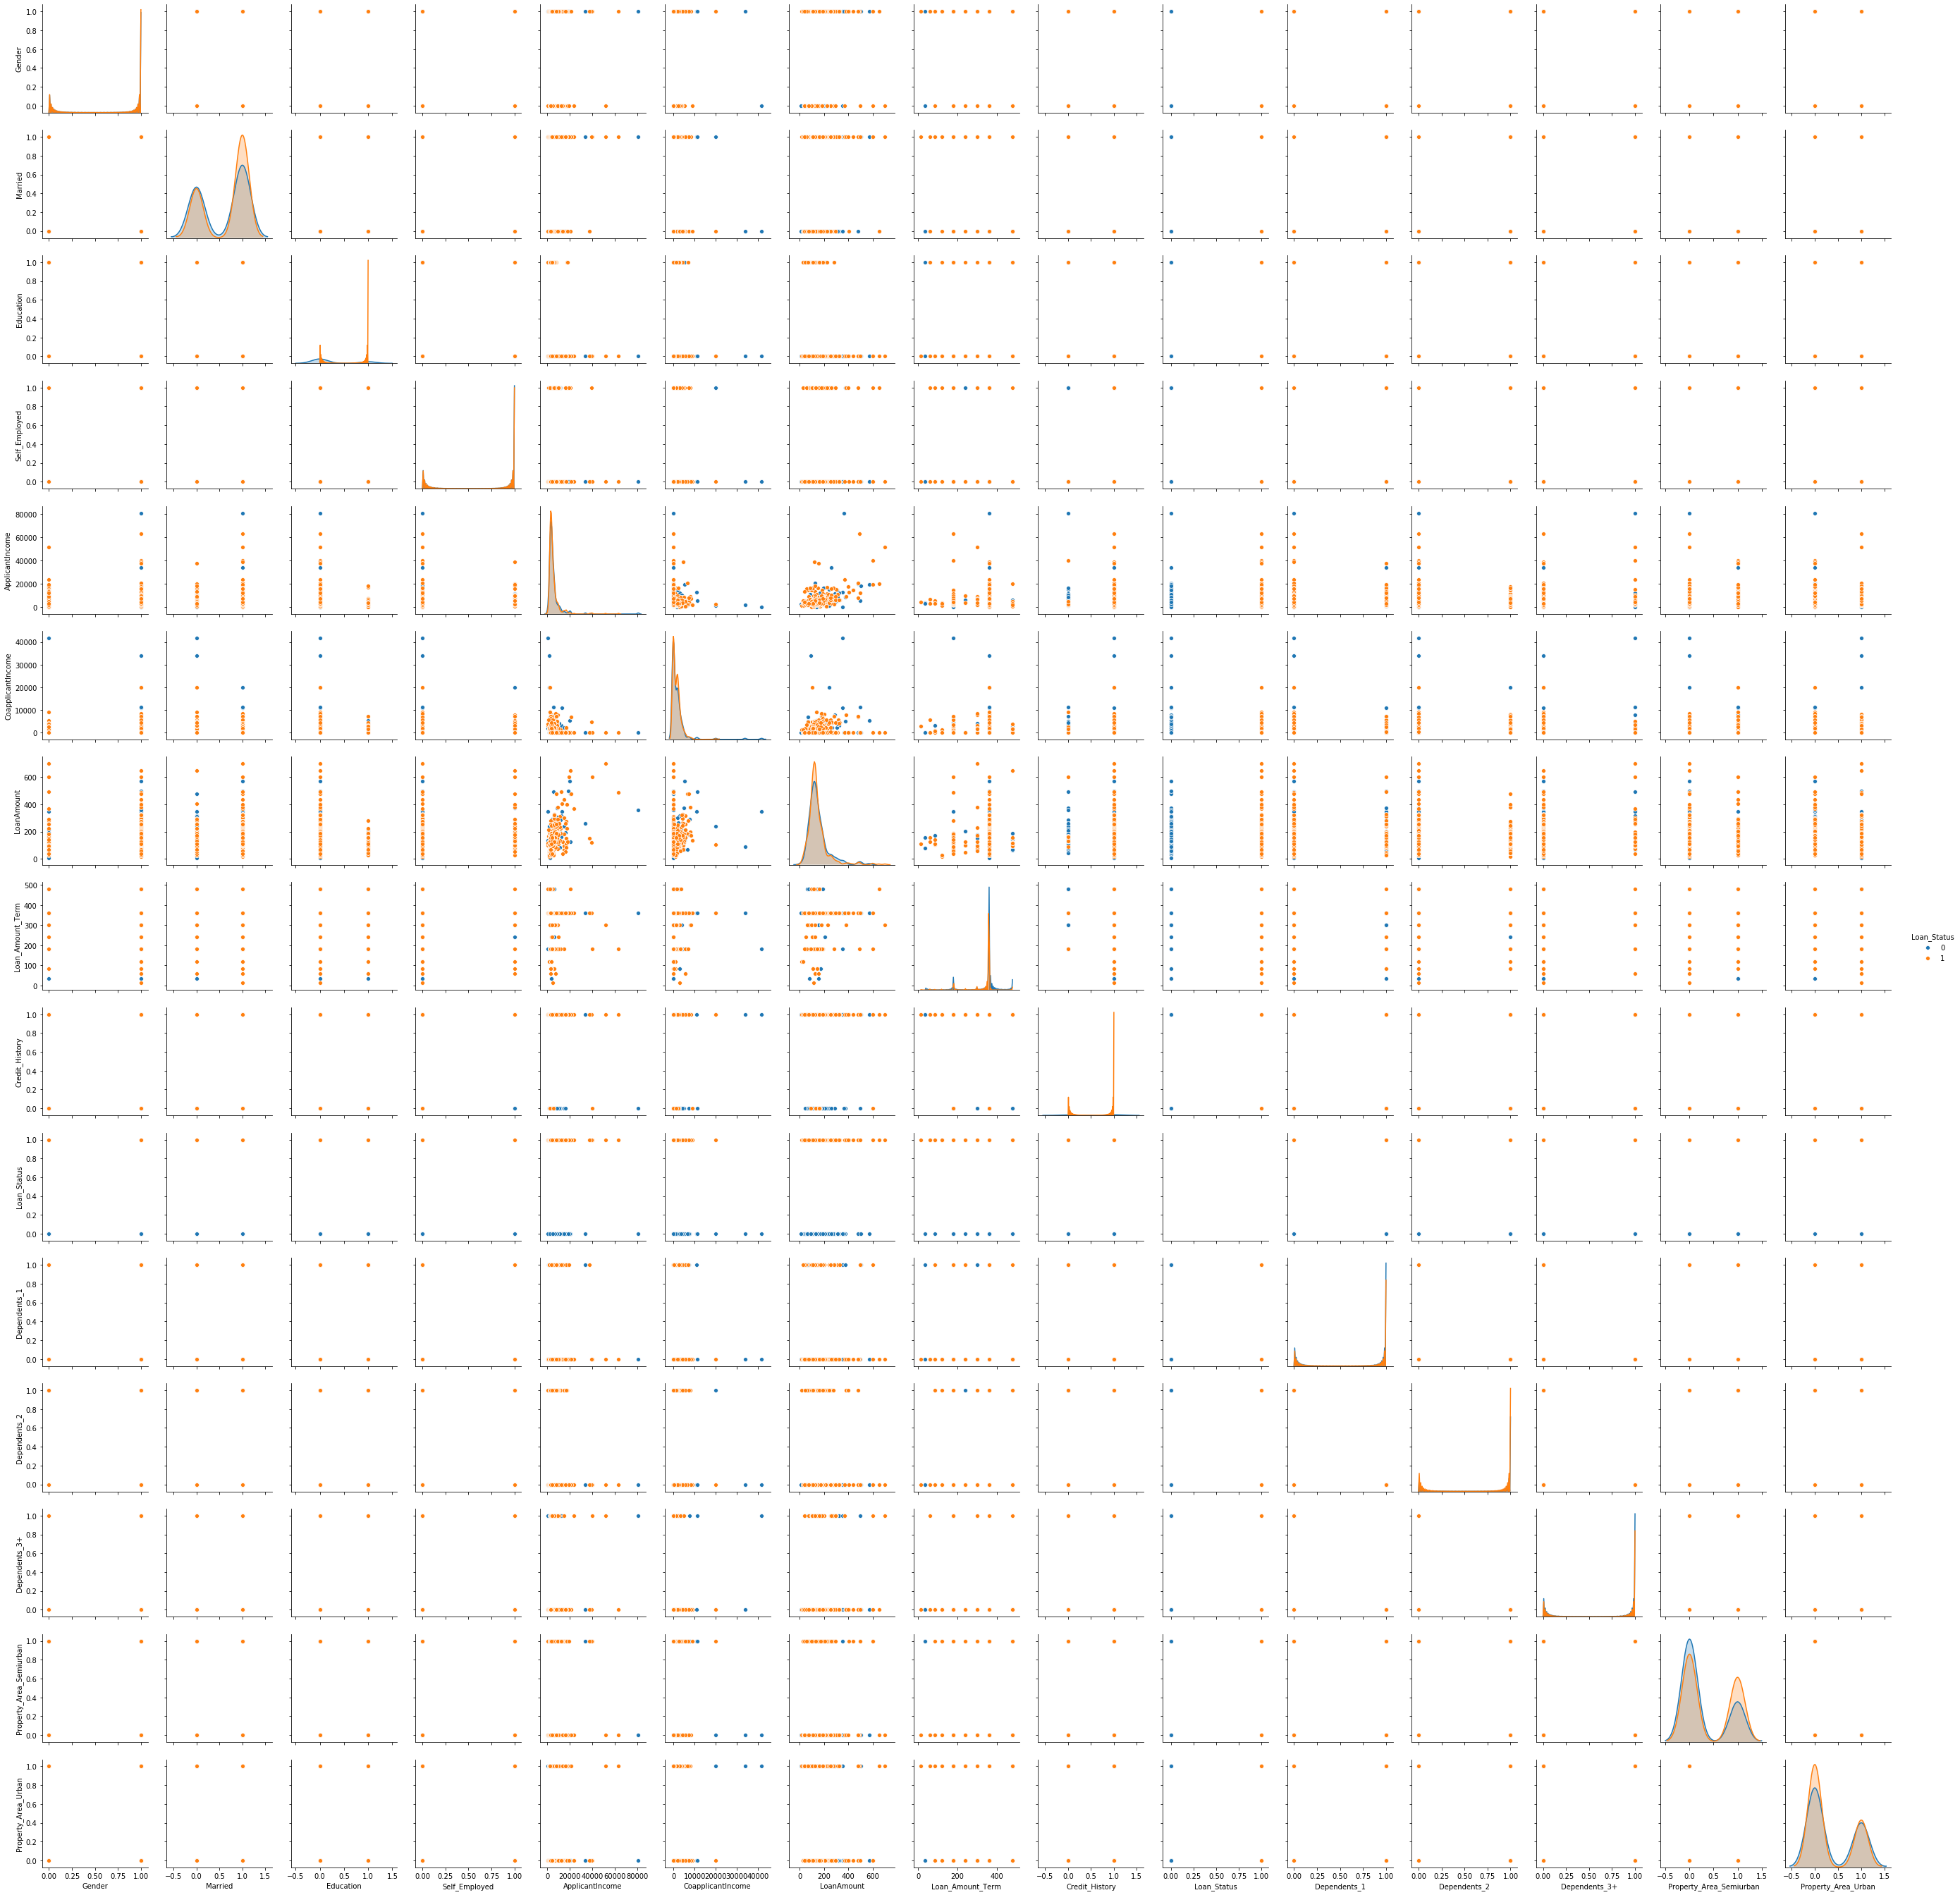

In [30]:
p=sns.pairplot(data_copy, hue = 'Loan_Status')

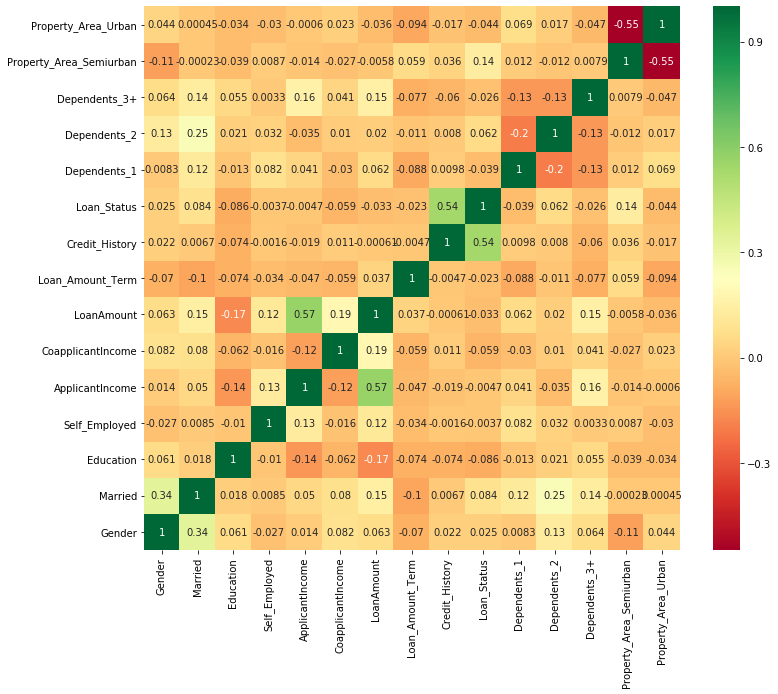

In [31]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn').set_ylim(0,15)  # seaborn has very simple solution for heatmap

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_copy.drop('Loan_Status',axis=1))
scaled_features = scaler.transform(data_copy.drop('Loan_Status',axis=1))
y = data_copy.Loan_Status

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Loan_Status"],axis = 1)))

In [34]:
y = data_copy.Loan_Status

In [35]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [38]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
predictions = dtree.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [41]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [42]:
conf_matrix,accuracy

(array([[ 38,  26],
        [ 38, 103]], dtype=int64), 0.6878048780487804)

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54        64
           1       0.80      0.73      0.76       141

    accuracy                           0.69       205
   macro avg       0.65      0.66      0.65       205
weighted avg       0.71      0.69      0.69       205



In [44]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
rfc_pred = rfc.predict(X_test)

In [47]:
print(confusion_matrix(y_test,rfc_pred))

[[ 37  27]
 [ 13 128]]


In [48]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65        64
           1       0.83      0.91      0.86       141

    accuracy                           0.80       205
   macro avg       0.78      0.74      0.76       205
weighted avg       0.80      0.80      0.80       205



In [50]:
from sklearn.model_selection import GridSearchCV
clf_RF=RandomForestClassifier()

parameters1 = {'criterion':('gini', 'entropy'), 'max_depth':[1,5,10,20,30,40,50,60],'n_estimators':[100,200,300,400,500,600,1000]}

clf = GridSearchCV(clf_RF, parameters1, cv=10,verbose=2)

clf.fit(X_train, y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .

[CV] .... criterion=gini, max_depth=1, n_estimators=600, total=   1.3s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV] ... criterion=gini, max_depth=1, n_estimators=1000, total=   2.1s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV] ... criterion=gini, max_depth=1, n_estimators=1000, total=   2.0s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV] ... criterion=gini, max_depth=1, n_estimators=1000, total=   2.1s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV] ... criterion=gini, max_depth=1, n_estimators=1000, total=   2.0s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV] ... criterion=gini, max_depth=1, n_estimators=1000, total=   1.9s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV] ... criterion=gini, max_depth=1, n_estimators=1000, total=   1.9s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV] .

[CV] .... criterion=gini, max_depth=5, n_estimators=500, total=   1.1s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................
[CV] .... criterion=gini, max_depth=5, n_estimators=500, total=   1.0s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................
[CV] .... criterion=gini, max_depth=5, n_estimators=500, total=   1.0s
[CV] criterion=gini, max_depth=5, n_estimators=600 ...................
[CV] .... criterion=gini, max_depth=5, n_estimators=600, total=   1.2s
[CV] criterion=gini, max_depth=5, n_estimators=600 ...................
[CV] .... criterion=gini, max_depth=5, n_estimators=600, total=   1.2s
[CV] criterion=gini, max_depth=5, n_estimators=600 ...................
[CV] .... criterion=gini, max_depth=5, n_estimators=600, total=   1.2s
[CV] criterion=gini, max_depth=5, n_estimators=600 ...................
[CV] .... criterion=gini, max_depth=5, n_estimators=600, total=   1.3s
[CV] criterion=gini, max_depth=5, n_estimators=600 ...................
[CV] .

[CV] ... criterion=gini, max_depth=10, n_estimators=400, total=   0.9s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=10, n_estimators=400, total=   1.1s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=10, n_estimators=400, total=   1.1s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=10, n_estimators=400, total=   1.0s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=10, n_estimators=400, total=   1.1s
[CV] criterion=gini, max_depth=10, n_estimators=500 ..................
[CV] ... criterion=gini, max_depth=10, n_estimators=500, total=   1.2s
[CV] criterion=gini, max_depth=10, n_estimators=500 ..................
[CV] ... criterion=gini, max_depth=10, n_estimators=500, total=   1.1s
[CV] criterion=gini, max_depth=10, n_estimators=500 ..................
[CV] .

[CV] ... criterion=gini, max_depth=20, n_estimators=300, total=   0.7s
[CV] criterion=gini, max_depth=20, n_estimators=300 ..................
[CV] ... criterion=gini, max_depth=20, n_estimators=300, total=   0.7s
[CV] criterion=gini, max_depth=20, n_estimators=300 ..................
[CV] ... criterion=gini, max_depth=20, n_estimators=300, total=   0.8s
[CV] criterion=gini, max_depth=20, n_estimators=300 ..................
[CV] ... criterion=gini, max_depth=20, n_estimators=300, total=   0.8s
[CV] criterion=gini, max_depth=20, n_estimators=300 ..................
[CV] ... criterion=gini, max_depth=20, n_estimators=300, total=   0.8s
[CV] criterion=gini, max_depth=20, n_estimators=300 ..................
[CV] ... criterion=gini, max_depth=20, n_estimators=300, total=   0.8s
[CV] criterion=gini, max_depth=20, n_estimators=300 ..................
[CV] ... criterion=gini, max_depth=20, n_estimators=300, total=   0.7s
[CV] criterion=gini, max_depth=20, n_estimators=400 ..................
[CV] .

[CV] ... criterion=gini, max_depth=30, n_estimators=200, total=   0.6s
[CV] criterion=gini, max_depth=30, n_estimators=200 ..................
[CV] ... criterion=gini, max_depth=30, n_estimators=200, total=   0.5s
[CV] criterion=gini, max_depth=30, n_estimators=200 ..................
[CV] ... criterion=gini, max_depth=30, n_estimators=200, total=   0.6s
[CV] criterion=gini, max_depth=30, n_estimators=200 ..................
[CV] ... criterion=gini, max_depth=30, n_estimators=200, total=   1.1s
[CV] criterion=gini, max_depth=30, n_estimators=200 ..................
[CV] ... criterion=gini, max_depth=30, n_estimators=200, total=   0.9s
[CV] criterion=gini, max_depth=30, n_estimators=200 ..................
[CV] ... criterion=gini, max_depth=30, n_estimators=200, total=   0.6s
[CV] criterion=gini, max_depth=30, n_estimators=200 ..................
[CV] ... criterion=gini, max_depth=30, n_estimators=200, total=   0.6s
[CV] criterion=gini, max_depth=30, n_estimators=200 ..................
[CV] .

[CV] .. criterion=gini, max_depth=30, n_estimators=1000, total=   2.4s
[CV] criterion=gini, max_depth=40, n_estimators=100 ..................
[CV] ... criterion=gini, max_depth=40, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=40, n_estimators=100 ..................
[CV] ... criterion=gini, max_depth=40, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=40, n_estimators=100 ..................
[CV] ... criterion=gini, max_depth=40, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_depth=40, n_estimators=100 ..................
[CV] ... criterion=gini, max_depth=40, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_depth=40, n_estimators=100 ..................
[CV] ... criterion=gini, max_depth=40, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=40, n_estimators=100 ..................
[CV] ... criterion=gini, max_depth=40, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=40, n_estimators=100 ..................
[CV] .

[CV] ... criterion=gini, max_depth=40, n_estimators=600, total=   1.4s
[CV] criterion=gini, max_depth=40, n_estimators=600 ..................
[CV] ... criterion=gini, max_depth=40, n_estimators=600, total=   1.4s
[CV] criterion=gini, max_depth=40, n_estimators=600 ..................
[CV] ... criterion=gini, max_depth=40, n_estimators=600, total=   1.4s
[CV] criterion=gini, max_depth=40, n_estimators=1000 .................
[CV] .. criterion=gini, max_depth=40, n_estimators=1000, total=   2.6s
[CV] criterion=gini, max_depth=40, n_estimators=1000 .................
[CV] .. criterion=gini, max_depth=40, n_estimators=1000, total=   2.7s
[CV] criterion=gini, max_depth=40, n_estimators=1000 .................
[CV] .. criterion=gini, max_depth=40, n_estimators=1000, total=   2.8s
[CV] criterion=gini, max_depth=40, n_estimators=1000 .................
[CV] .. criterion=gini, max_depth=40, n_estimators=1000, total=   3.0s
[CV] criterion=gini, max_depth=40, n_estimators=1000 .................
[CV] .

[CV] ... criterion=gini, max_depth=50, n_estimators=500, total=   1.1s
[CV] criterion=gini, max_depth=50, n_estimators=500 ..................
[CV] ... criterion=gini, max_depth=50, n_estimators=500, total=   1.2s
[CV] criterion=gini, max_depth=50, n_estimators=500 ..................
[CV] ... criterion=gini, max_depth=50, n_estimators=500, total=   1.1s
[CV] criterion=gini, max_depth=50, n_estimators=500 ..................
[CV] ... criterion=gini, max_depth=50, n_estimators=500, total=   1.1s
[CV] criterion=gini, max_depth=50, n_estimators=500 ..................
[CV] ... criterion=gini, max_depth=50, n_estimators=500, total=   1.2s
[CV] criterion=gini, max_depth=50, n_estimators=600 ..................
[CV] ... criterion=gini, max_depth=50, n_estimators=600, total=   1.4s
[CV] criterion=gini, max_depth=50, n_estimators=600 ..................
[CV] ... criterion=gini, max_depth=50, n_estimators=600, total=   1.4s
[CV] criterion=gini, max_depth=50, n_estimators=600 ..................
[CV] .

[CV] ... criterion=gini, max_depth=60, n_estimators=400, total=   1.1s
[CV] criterion=gini, max_depth=60, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=60, n_estimators=400, total=   1.3s
[CV] criterion=gini, max_depth=60, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=60, n_estimators=400, total=   1.3s
[CV] criterion=gini, max_depth=60, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=60, n_estimators=400, total=   1.0s
[CV] criterion=gini, max_depth=60, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=60, n_estimators=400, total=   0.9s
[CV] criterion=gini, max_depth=60, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=60, n_estimators=400, total=   0.9s
[CV] criterion=gini, max_depth=60, n_estimators=400 ..................
[CV] ... criterion=gini, max_depth=60, n_estimators=400, total=   0.9s
[CV] criterion=gini, max_depth=60, n_estimators=500 ..................
[CV] .

[CV] . criterion=entropy, max_depth=1, n_estimators=300, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV] . criterion=entropy, max_depth=1, n_estimators=300, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV] . criterion=entropy, max_depth=1, n_estimators=300, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV] . criterion=entropy, max_depth=1, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV] . criterion=entropy, max_depth=1, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV] . criterion=entropy, max_depth=1, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV] . criterion=entropy, max_depth=1, n_estimators=300, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................
[CV] .

[CV] . criterion=entropy, max_depth=5, n_estimators=100, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=200, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................
[CV] .

[CV]  criterion=entropy, max_depth=5, n_estimators=1000, total=   3.5s
[CV] criterion=entropy, max_depth=5, n_estimators=1000 ...............
[CV]  criterion=entropy, max_depth=5, n_estimators=1000, total=   3.7s
[CV] criterion=entropy, max_depth=5, n_estimators=1000 ...............
[CV]  criterion=entropy, max_depth=5, n_estimators=1000, total=   4.0s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.5s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  

[CV]  criterion=entropy, max_depth=10, n_estimators=600, total=   2.2s
[CV] criterion=entropy, max_depth=10, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=600, total=   2.1s
[CV] criterion=entropy, max_depth=10, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=600, total=   2.2s
[CV] criterion=entropy, max_depth=10, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=600, total=   2.3s
[CV] criterion=entropy, max_depth=10, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=600, total=   2.6s
[CV] criterion=entropy, max_depth=10, n_estimators=1000 ..............
[CV]  criterion=entropy, max_depth=10, n_estimators=1000, total=   4.2s
[CV] criterion=entropy, max_depth=10, n_estimators=1000 ..............
[CV]  criterion=entropy, max_depth=10, n_estimators=1000, total=   3.7s
[CV] criterion=entropy, max_depth=10, n_estimators=1000 ..............
[CV]

[CV]  criterion=entropy, max_depth=20, n_estimators=500, total=   2.4s
[CV] criterion=entropy, max_depth=20, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=500, total=   2.2s
[CV] criterion=entropy, max_depth=20, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=500, total=   2.5s
[CV] criterion=entropy, max_depth=20, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=500, total=   2.3s
[CV] criterion=entropy, max_depth=20, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=500, total=   2.1s
[CV] criterion=entropy, max_depth=20, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=500, total=   1.9s
[CV] criterion=entropy, max_depth=20, n_estimators=500 ...............
[CV]  criterion=entropy, max_depth=20, n_estimators=500, total=   2.1s
[CV] criterion=entropy, max_depth=20, n_estimators=600 ...............
[CV]  

[CV]  criterion=entropy, max_depth=30, n_estimators=400, total=   1.3s
[CV] criterion=entropy, max_depth=30, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=30, n_estimators=400, total=   1.2s
[CV] criterion=entropy, max_depth=30, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=30, n_estimators=400, total=   1.1s
[CV] criterion=entropy, max_depth=30, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=30, n_estimators=400, total=   1.1s
[CV] criterion=entropy, max_depth=30, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=30, n_estimators=400, total=   1.2s
[CV] criterion=entropy, max_depth=30, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=30, n_estimators=400, total=   1.1s
[CV] criterion=entropy, max_depth=30, n_estimators=400 ...............
[CV]  criterion=entropy, max_depth=30, n_estimators=400, total=   1.2s
[CV] criterion=entropy, max_depth=30, n_estimators=400 ...............
[CV]  

[CV]  criterion=entropy, max_depth=40, n_estimators=200, total=   0.6s
[CV] criterion=entropy, max_depth=40, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=40, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=40, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=40, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=40, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=40, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=40, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=40, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=40, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=40, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=40, n_estimators=300 ...............
[CV]  criterion=entropy, max_depth=40, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=40, n_estimators=300 ...............
[CV]  

[CV]  criterion=entropy, max_depth=50, n_estimators=100, total=   0.3s
[CV] criterion=entropy, max_depth=50, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=50, n_estimators=100, total=   0.3s
[CV] criterion=entropy, max_depth=50, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=50, n_estimators=100, total=   0.3s
[CV] criterion=entropy, max_depth=50, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=50, n_estimators=200, total=   0.5s
[CV] criterion=entropy, max_depth=50, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=50, n_estimators=200, total=   0.5s
[CV] criterion=entropy, max_depth=50, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=50, n_estimators=200, total=   0.5s
[CV] criterion=entropy, max_depth=50, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=50, n_estimators=200, total=   0.5s
[CV] criterion=entropy, max_depth=50, n_estimators=200 ...............
[CV]  

[CV]  criterion=entropy, max_depth=50, n_estimators=1000, total=   2.4s
[CV] criterion=entropy, max_depth=50, n_estimators=1000 ..............
[CV]  criterion=entropy, max_depth=50, n_estimators=1000, total=   2.5s
[CV] criterion=entropy, max_depth=50, n_estimators=1000 ..............
[CV]  criterion=entropy, max_depth=50, n_estimators=1000, total=   2.5s
[CV] criterion=entropy, max_depth=50, n_estimators=1000 ..............
[CV]  criterion=entropy, max_depth=50, n_estimators=1000, total=   2.4s
[CV] criterion=entropy, max_depth=50, n_estimators=1000 ..............
[CV]  criterion=entropy, max_depth=50, n_estimators=1000, total=   2.8s
[CV] criterion=entropy, max_depth=60, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=60, n_estimators=100, total=   0.3s
[CV] criterion=entropy, max_depth=60, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=60, n_estimators=100, total=   0.3s
[CV] criterion=entropy, max_depth=60, n_estimators=100 ...............
[

[CV]  criterion=entropy, max_depth=60, n_estimators=600, total=   2.0s
[CV] criterion=entropy, max_depth=60, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=60, n_estimators=600, total=   1.5s
[CV] criterion=entropy, max_depth=60, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=60, n_estimators=600, total=   1.5s
[CV] criterion=entropy, max_depth=60, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=60, n_estimators=600, total=   1.5s
[CV] criterion=entropy, max_depth=60, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=60, n_estimators=600, total=   1.9s
[CV] criterion=entropy, max_depth=60, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=60, n_estimators=600, total=   1.8s
[CV] criterion=entropy, max_depth=60, n_estimators=600 ...............
[CV]  criterion=entropy, max_depth=60, n_estimators=600, total=   1.9s
[CV] criterion=entropy, max_depth=60, n_estimators=1000 ..............
[CV]  

[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed: 22.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [51]:
print("\n\nthe accuracy of the model is :",clf.score(X_test, y_test))

print("\n\nthe best model is :",clf.best_score_)

print("\n\nthe best Parameters is :",clf.best_params_)



the accuracy of the model is : 0.8390243902439024


the best model is : 0.7945731707317074


the best Parameters is : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}


In [53]:
rfc_Rand = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=5)
rfc_Rand.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
rfc_prediction = rfc_Rand.predict(X_test)

In [56]:
print(confusion_matrix(y_test,rfc_prediction))

[[ 34  30]
 [  3 138]]


In [58]:
print(classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       0.92      0.53      0.67        64
           1       0.82      0.98      0.89       141

    accuracy                           0.84       205
   macro avg       0.87      0.75      0.78       205
weighted avg       0.85      0.84      0.82       205

